#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [41]:
!pip install MiniSom

## Importing the libraries


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [43]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [44]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [45]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


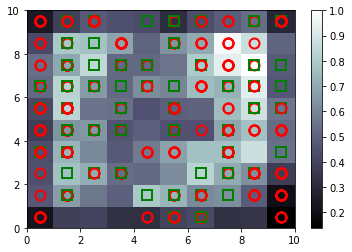

In [46]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [47]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [48]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15570990
15618703
15583724
15683168
15618410
15678882
15617348
15682860
15671769
15723827
15774262
15638989
15690492
15750921
15728010
15627190
15689268
15638871
15607746
15717065
15744423
15605341
15580366
15649430
15785705
15706394
15595010


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [49]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [50]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [52]:
import tensorflow as tf
tf.__version__

'2.8.0'

## Initializing the ANN

In [53]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [54]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [55]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [56]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [57]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.8043

## Predicting test set results

In [58]:
y_pred = ann.predict(customers)
print(y_pred)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

[[1.64705217e-02]
 [1.74820423e-04]
 [2.05665827e-04]
 [4.07499075e-03]
 [1.07535779e-01]
 [8.26895237e-03]
 [4.93547320e-03]
 [3.85120511e-03]
 [1.26481056e-03]
 [4.99822497e-02]
 [1.61459446e-01]
 [2.20441222e-01]
 [3.05642784e-02]
 [1.44659907e-01]
 [2.96628773e-02]
 [6.11418486e-03]
 [3.18127811e-01]
 [4.12005186e-03]
 [4.57882881e-04]
 [2.16785073e-03]
 [3.53723764e-04]
 [1.56104565e-04]
 [7.61196017e-03]
 [5.98716736e-03]
 [2.45630741e-03]
 [1.50312513e-01]
 [5.15252352e-04]
 [1.60239935e-02]
 [3.19436193e-03]
 [2.30088413e-01]
 [1.46913290e-01]
 [4.17031370e-05]
 [1.73434615e-03]
 [1.67893201e-01]
 [2.13725686e-01]
 [1.16849840e-02]
 [7.01454282e-03]
 [3.99577558e-01]
 [4.37398851e-02]
 [1.66684091e-02]
 [1.40330195e-03]
 [1.43873692e-03]
 [1.73372030e-03]
 [4.02050823e-01]
 [2.54949927e-03]
 [1.20072365e-02]
 [1.65652964e-05]
 [3.16533446e-03]
 [2.58333148e-05]
 [8.61728191e-03]
 [2.81904638e-02]
 [1.03273988e-03]
 [4.70548868e-04]
 [9.20534134e-04]
 [1.55745745e-02]
 [2.516732

In [59]:
print(y_pred)

[[1.56946660e+07 4.27576788e-06]
 [1.56992380e+07 5.66674134e-06]
 [1.55777710e+07 6.42514897e-06]
 ...
 [1.57063940e+07 7.04715133e-01]
 [1.56892680e+07 7.64824212e-01]
 [1.57280100e+07 8.36961985e-01]]
